week 6: visualizing time series data


Assignment Content

Acquire power data from this source for at least 10 days and not more than 40 days. The website limits the window size, so you will need to download multiple files. Load the data into a Jupyter Notebook. Combine the multiple input files to create a single dataframe.

Create two bar graphs of the power consumption per hour.

One bar graph has 24 bars; each bar is the average across all days for that hour​
one bar graph has 24*(number of days) bars. Your choice of average or sum for each hour. Label the y-axis appropriately.


In [60]:
import pandas as p # importing required libraries
import numpy as n
import seaborn as s
import matplotlib.pyplot as plot

In [62]:
df=p.read_csv("C:/Users/pragathi/Downloads/RollingSystemDemand_20220326_0343.csv") #reading the 1 st file

In [63]:
df.head()

,HDR,ROLLING SYSTEM DEMAND,Unnamed: 2
0,VD,2.022030e+13,27819
1,VD,2.022030e+13,27792
2,VD,2.022030e+13,27763
3,VD,2.022030e+13,27709
4,VD,2.022030e+13,27698


In [64]:
df1=p.read_csv("C:/Users/pragathi/Downloads/RollingSystemDemand_20220326_0343.csv",names=['VD','date&time','Demand'], index_col=False, header=0, parse_dates=[1])
#giving heading names

In [65]:
df1.head()

,VD,date&time,Demand
0,VD,2.02203E+13,27819
1,VD,2.02203E+13,27792
2,VD,2.02203E+13,27763
3,VD,2.02203E+13,27709
4,VD,2.02203E+13,27698


In [66]:
df1.shape

(2000, 3)

In [67]:
df2=p.read_csv("C:/Users/pragathi/Downloads/RollingSystemDemand_20220326_0402 - Copy.csv",names=['VD','date&time','Demand'], index_col=False, header=0, parse_dates=[1])
#reading 2 nd csv file

In [68]:
df2.head()

,VD,date&time,Demand
0,VD,2.02203E+13,27315
1,VD,2.02E+13,27694
2,VD,2.02E+13,27723
3,VD,2.02E+13,27775
4,VD,2.02E+13,27747


In [70]:
df3 = p.concat([df1, df2],names=['VD','date&time','Demand']) #forming 2 files into single file
df3.head()

,VD,date&time,Demand
0,VD,2.02203E+13,27819
1,VD,2.02203E+13,27792
2,VD,2.02203E+13,27763
3,VD,2.02203E+13,27709
4,VD,2.02203E+13,27698


In [71]:
df3['Date'] = p.to_datetime(df3['date&time'], format='%Y%m%d%H%M%S',errors='coerce')
df3['hours'] = df3['Date'].dt.hour                                # extracting hours from datetime format

In [72]:
avg_demand = df3.groupby(df3['hours'])['Demand'].mean() # finding average demand based on hours
avg_demand

Series([], Name: Demand, dtype: float64)

<AxesSubplot:xlabel='date&time', ylabel='Demand'>

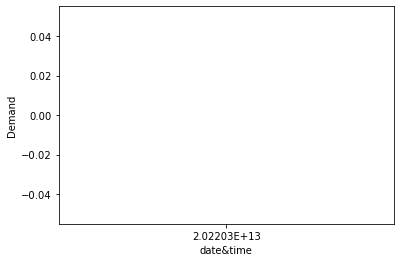

In [74]:
s.barplot(df3['date&time'],avg_demand)

In [73]:
s.barplot(df3['hours'],avg_demand)
plot.title('Average demand of all days for a particular hour')
plot.xlabel('Hours')
plot.ylabel('Average Demand (MW)')

C:\Users\pragathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: min() arg is an empty sequence

#reference

https://ourcodingclub.github.io/tutorials/pandas-time-series/

https://www.askpython.com/python/built-in-methods/python-iloc-function

https://www.datasciencemadesimple.com/get-hour-from-timestamp-pandas-python-2/